In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load sample data
# Example data: 'conversion' indicates whether a user converted (1) or not (0)
data = {
    'Group': ['A'] * 1000 + ['B'] * 1000,
    'Conversion': np.concatenate([np.random.binomial(1, 0.1, 1000), np.random.binomial(1, 0.12, 1000)])
}
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())


  Group  Conversion
0     A           0
1     A           0
2     A           0
3     A           0
4     A           0


In [3]:
# Group by 'Group' and calculate conversion rates
conversion_rates = df.groupby('Group')['Conversion'].mean()
print(conversion_rates)

Group
A    0.098
B    0.132
Name: Conversion, dtype: float64


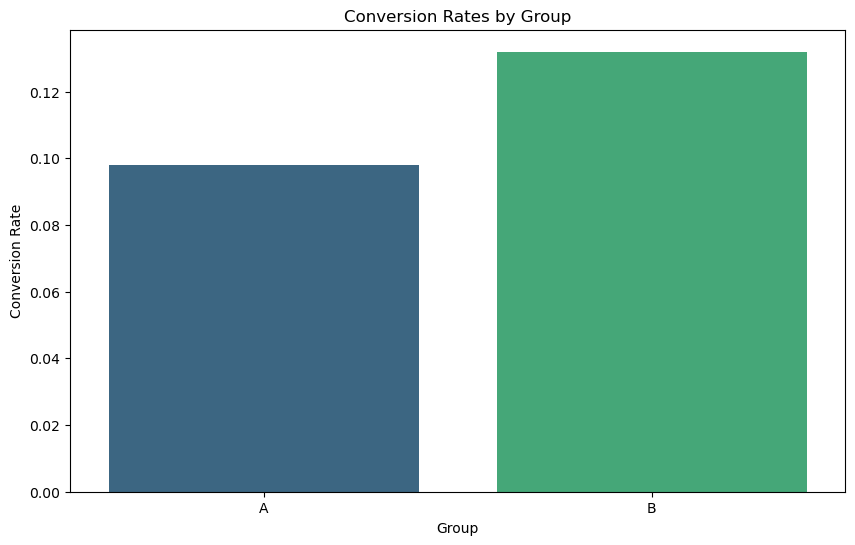

In [8]:
# Visualize the conversion rates
plt.figure(figsize=(10, 6))
sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette='viridis')
plt.title('Conversion Rates by Group')
plt.xlabel('Group')
plt.ylabel('Conversion Rate')
plt.show()

In [5]:
# Extract conversion rates and sample sizes
conversions_a = df[df['Group'] == 'A']['Conversion']
conversions_b = df[df['Group'] == 'B']['Conversion']

n_a = len(conversions_a)
n_b = len(conversions_b)
p_a = conversions_a.mean()
p_b = conversions_b.mean()

# Combined proportion
p_combined = (conversions_a.sum() + conversions_b.sum()) / (n_a + n_b)

# Standard error
se = np.sqrt(p_combined * (1 - p_combined) * (1/n_a + 1/n_b))

# Z-score
z = (p_a - p_b) / se

# P-value
p_value = 1 - stats.norm.cdf(z)

print(f'Z-score: {z:.3f}')
print(f'P-value: {p_value:.3f}')


Z-score: -2.383
P-value: 0.991


In [6]:
# Confidence interval
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha / 2)
margin_of_error = z_critical * se

difference = p_a - p_b
confidence_interval = (difference - margin_of_error, difference + margin_of_error)

print(f'95% Confidence Interval for the Difference: {confidence_interval}')


95% Confidence Interval for the Difference: (-0.06196299238193741, -0.006037007618062602)


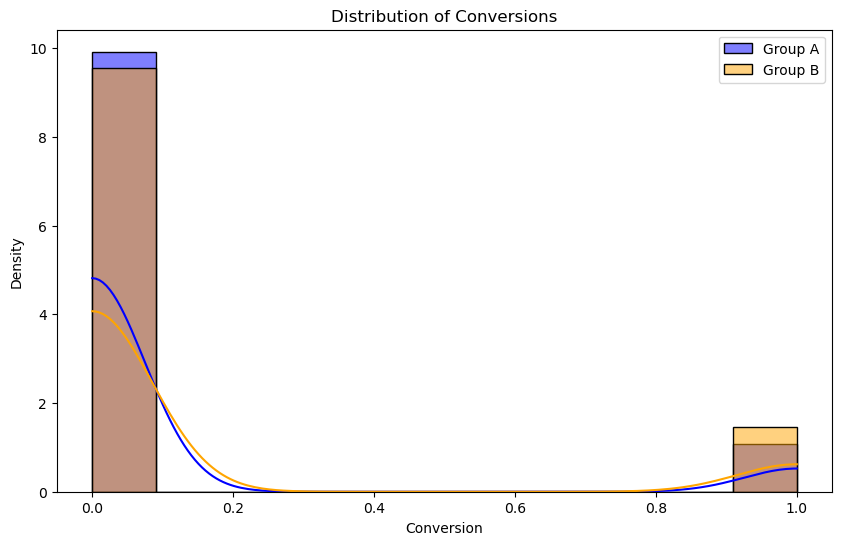

In [7]:
# Plot the distributions of conversions
plt.figure(figsize=(10, 6))
sns.histplot(conversions_a, kde=True, label='Group A', color='blue', stat='density')
sns.histplot(conversions_b, kde=True, label='Group B', color='orange', stat='density')
plt.title('Distribution of Conversions')
plt.xlabel('Conversion')
plt.ylabel('Density')
plt.legend()
plt.show() 
